In [ ]:
## Warning: This will not work without a complete installation of FEniCS
# see: https://fenicsproject.org/
# this will NOT work in Google Colab, FEniCS needs to run on linux distro or docker

In [ ]:
# fenics Finite Element
from fenics import *
from mshr import *
from dolfin import *

# typical libaries
import numpy as np
import matplotlib.pyplot as plt

#% matplotlib notebook
from IPython.display import Image
from IPython.display import set_matplotlib_formats
from IPython.display import clear_output
set_matplotlib_formats('png', 'pdf')
get_ipython().run_line_magic('matplotlib', 'inline')


plt.rcParams['figure.figsize'] = [15, 10]


In [ ]:
plt.rcParams['figure.figsize'] = [5, 10]

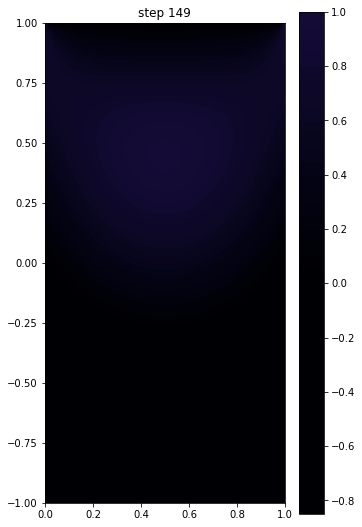

In [ ]:
from __future__ import print_function
from fenics import *
import time

T = 1.5           # final time
num_steps = 150     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 50
mesh = RectangleMesh(Point(0, -1), Point(1, 1), nx, ny)
V = FunctionSpace(mesh, 'P', 1)

gD_bottom = Expression('0', degree = 1) 
gD_top = Expression('0', degree = 1) 
gD_left = Expression('sin(x[1])', degree = 1) 
gD_right = Expression('sin(x[1])', degree = 1) 
#gD_right = Constant(10.0) #Square Duct

tol = 1E-10 #very small value #0.000000000000000001
def bottom(x):
    return abs(x[1] + 1) < tol
def top(x):
    return abs(x[1] - 1) < tol
def left(x):
    return abs(x[0]) < tol
def right(x):
    return abs(x[0] - 1) < tol
    

bc_bottom = DirichletBC (V , gD_bottom, bottom )
bc_top = DirichletBC(V, gD_top, top)
bc_left = DirichletBC(V, gD_left, left)
bc_right = DirichletBC(V, gD_right, right)

bcs = [bc_bottom, bc_top, bc_left, bc_right] #store boundaries

# Define initial value
u_0 = Expression('10',# sin(x[1]) + sin(x[0]) #'exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree = 1, a = 5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
k = Constant(.90)


F = k*u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0

gif_names = []
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bcs)

    # Save to file and plot solution
    vtkfile << (u, t)
    ax = plot(u, cmap = 'inferno', vmax = 10, vmin = 0)
    plt.colorbar(ax, fraction = 0.09)
    plt.title('step {}'.format(n))
    
    g_name = f'gif/{n}.png'
    gif_names.append(g_name)
    plt.savefig(g_name)
    
    plt.show()
    plt.close()
    clear_output(wait=True)

    # Update previous solution
    u_n.assign(u)
    
    
# Hold plot
#interactive()




In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
    
with imageio.get_writer('Fenics_Heat_Diffusion.gif', mode = 'I') as writer:
    for g_name in gif_names:
        image = imageio.imread(g_name)
        writer.append_data(image)